# <font color = brown> Lead Scoring Case Study - Logistic Regression </font>


In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

pd.set_option('display.max_columns',200)

# <font color = blue >Problem Statement </font>

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

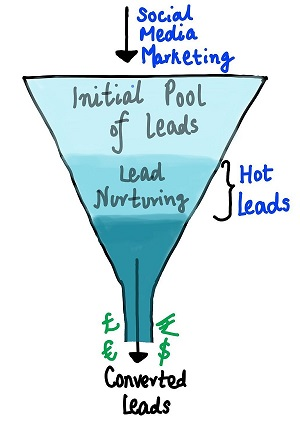
Lead Conversion Process - Demonstrated as a funnel

As shown, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education want us to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Goals of the Case Study

There are quite a few goals for this case study.

1) Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2) There are some more problems presented by the company which the  model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. We need to fill it based on the logistic regression model we got in the first step. Also, make sure to include this in final PPT with recommendations.

# Reading and Data Inspection 

In [3]:
# Reading data dictionary

data_dict = pd.read_excel("Leads Data Dictionary.xlsx")
data_dict

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Variables,Description
2,NaN,Prospect ID,A unique ID with which the customer is identif...
3,NaN,Lead Number,A lead number assigned to each lead procured.
4,NaN,Lead Origin,The origin identifier with which the customer ...
5,NaN,Lead Source,"The source of the lead. Includes Google, Organ..."
6,NaN,Do Not Email,An indicator variable selected by the customer...
7,NaN,Do Not Call,An indicator variable selected by the customer...
8,NaN,Converted,The target variable. Indicates whether a lead ...
9,NaN,TotalVisits,The total number of visits made by the custome...


In [4]:
leads = pd.read_csv("leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Checking shape of data

leads.shape

(9240, 37)

In [6]:
# Cheking info

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# EDA : Data cleaning, univariate, bivariate analysis and visualization


In [8]:
# Checking for Null values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# Cheching for duplicate values :

leads[leads.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


### No duplicate values found

### We can see that there are " Select " values, converting them to nan as they are as good as null

In [10]:
leads = leads.replace('Select', np.nan)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
# Now Checking for % missing values :

round((leads.isnull().sum()/len(leads.index)*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [12]:
# Dropping Prospect ID & Lead number number as they are not relevant :

leads = leads.drop(["Prospect ID","Lead Number"],axis = 1)

In [13]:
# Dropping columns with more than 45% of missing values :

leads = leads.drop(["How did you hear about X Education","Lead Quality","Lead Profile",
                   "Asymmetrique Activity Index","Asymmetrique Profile Index",
                    "Asymmetrique Activity Score","Asymmetrique Profile Score"], axis =1)


In [14]:
# Checking for % missing values :

round((leads.isnull().sum()/len(leads.index)*100),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### Working in remaining columns with missing value

### Columns with Categorical Variables

In [15]:
# Missing value treatement for Country with 26.63% of missing values:

leads.Country.value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Germany                    4
Nigeria                    4
South Africa               4
Canada                     4
Kuwait                     4
Sweden                     3
Belgium                    2
Philippines                2
Uganda                     2
Bangladesh                 2
Italy                      2
Asia/Pacific Region        2
China                      2
Netherlands                2
Ghana                      2
Tanzania                   1
Malaysia                   1
Kenya                      1
Liberia                    1
Denmark                    1
Russia        

In [16]:
# Checking for Country % :
round(100*leads.Country.value_counts(dropna = False)/len(leads['Country']),2)


India                   70.26
NaN                     26.63
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Bahrain                  0.08
Hong Kong                0.08
Oman                     0.06
France                   0.06
unknown                  0.05
Germany                  0.04
Nigeria                  0.04
South Africa             0.04
Canada                   0.04
Kuwait                   0.04
Sweden                   0.03
Belgium                  0.02
Philippines              0.02
Uganda                   0.02
Bangladesh               0.02
Italy                    0.02
Asia/Pacific Region      0.02
China                    0.02
Netherlands              0.02
Ghana                    0.02
Tanzania                 0.01
Malaysia                 0.01
Kenya                    0.01
Liberia                  0.01
Denmark   

In [17]:
# Imputing nan values in Country column with India as India is occuring more than 70% in country

leads['Country'] = leads['Country'].replace(np.nan,'India')

# Checking for Country % :
round(100*leads.Country.value_counts(dropna = False)/len(leads['Country']),2)


India                   96.89
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Bahrain                  0.08
Hong Kong                0.08
Oman                     0.06
France                   0.06
unknown                  0.05
South Africa             0.04
Germany                  0.04
Kuwait                   0.04
Nigeria                  0.04
Canada                   0.04
Sweden                   0.03
Asia/Pacific Region      0.02
Uganda                   0.02
Bangladesh               0.02
Netherlands              0.02
Ghana                    0.02
China                    0.02
Italy                    0.02
Belgium                  0.02
Philippines              0.02
Indonesia                0.01
Sri Lanka                0.01
Malaysia                 0.01
Switzerland              0.01
Russia                   0.01
Denmark   

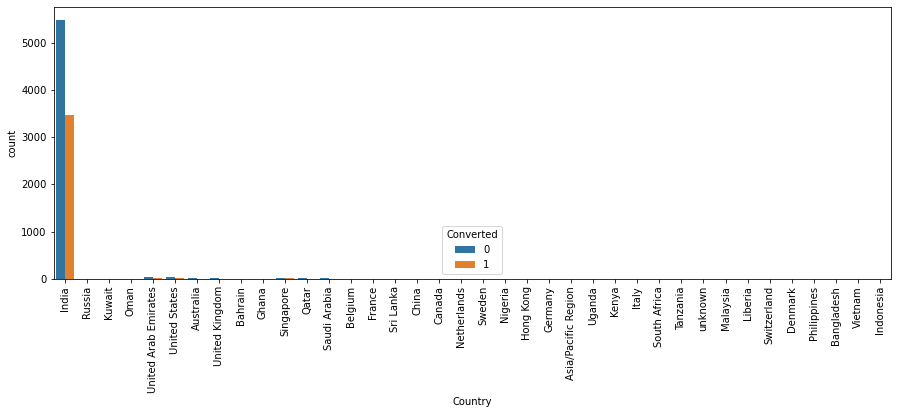

In [18]:
# Plotting Countries after imputing missing values with mode:

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Country, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [19]:
# Now India is occuring around 97%, we can drop this column as it shows high imbalance towards 
# one country only

leads = leads.drop(['Country'], axis = 1)
round((leads.isnull().sum()/len(leads.index)*100),2)



Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [20]:
#Checking for "City" column

leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [21]:
# Checking % vaule counts for "City" :

round(100*leads['City'].value_counts(dropna=False)/len(leads['City']),2)

NaN                            39.71
Mumbai                         34.87
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64

In [22]:
# Since Mumbai is occuring the most, replacing nan values by Mumbai:

leads['City'] = leads['City'].replace(np.nan,'Mumbai')

# Checking for Country % :
round(100*leads.City.value_counts(dropna = False)/len(leads['City']),2)

Mumbai                         74.58
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64

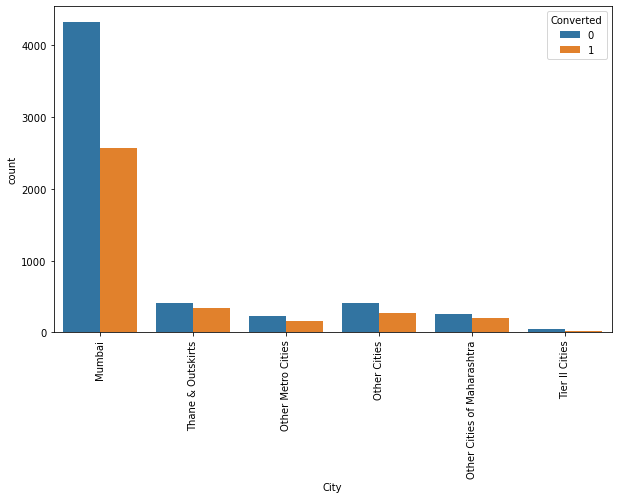

In [23]:
# Plotting City after imputing missing values with mode:

plt.figure(figsize=(10,6))
s1=sns.countplot(leads.City, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [24]:
# Mumbai is occuring around 75%, we can drop this column as it shows high imbalance towards 
# one country only

leads = leads.drop(['City'], axis = 1)
round((leads.isnull().sum()/len(leads.index)*100),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [25]:
# Checking value counts for the column Lead Source

leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
testone                 1
WeLearn                 1
welearnblog_Home        1
NC_EDM                  1
Pay per Click Ads       1
blog                    1
youtubechannel          1
Name: Lead Source, dtype: int64

In [26]:
# Google is occuring maximum (Mode), so converting nan  to Google
# Also Google is occuring twice , combining it into one "Google" 
# Combining low frequency categories

leads['Lead Source'] = leads['Lead Source'].replace(np.nan, 'Google')
leads['Lead Source'] = leads['Lead Source'].replace('google', 'Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')                            
leads['Lead Source'].value_counts(dropna=False)

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                19
Live Chat              2
Name: Lead Source, dtype: int64

In [27]:
# Checking value counts for the column TotalVisits

leads['TotalVisits'].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
27.0        5
25.0        5
24.0        5
22.0        3
26.0        2
29.0        2
28.0        2
115.0       1
54.0        1
43.0        1
30.0        1
32.0        1
74.0        1
251.0       1
41.0        1
141.0       1
42.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [28]:
# Imputing nan values by median :

leads['TotalVisits'] = leads['TotalVisits'].replace(np.nan, leads['TotalVisits'].median())

In [29]:
# Checking the value counts for column Page Views Per Visit

leads['Page Views Per Visit'].value_counts(dropna=False)

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.45       1
1.64       1
1.21       1
2.14       1
3.83       1
Name: Page Views Per Visit, Length: 115, dtype: int64

In [30]:
# Imputing nan values by median :

leads['Page Views Per Visit'] = leads['Page Views Per Visit'].replace(np.nan, leads['Page Views Per Visit'].median())

In [31]:
# Checking the value counts for column Last Activity

leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [32]:
# Since we are not sure what can be the last activity for nan customers, marking them as "Others" and also combining low frequency values to "Others"

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')


In [33]:
# Checking the value counts for column Specialization

leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [34]:
# Replacing nan by creating new category "Others" and they have not selected any domain which may be beause the haven't worked yet.

leads['Specialization'] = leads['Specialization'].replace(np.nan,'Others')

In [35]:
# Checking value count for column "What is your current occupation"

leads["What is your current occupation"].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [36]:
# Replacing nan with highest occuring category (Mode) "Unemployed"

leads["What is your current occupation"] = leads["What is your current occupation"].replace(np.nan,"Unemployed")
leads["What is your current occupation"].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [37]:
# Checking the value counts of column "What matters most to you in choosing a course"
leads["What matters most to you in choosing a course"].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [38]:
# Replacing nan with highest occuring category (Mode) "Better Career Prospects"

leads["What matters most to you in choosing a course"] = leads["What matters most to you in choosing a course"].replace(np.nan,"Better Career Prospects")
leads["What matters most to you in choosing a course"].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [39]:
# Checking the value counts of column "Tags"

leads["Tags"].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [40]:
# Creating new category "Others" for nan since it not clear what category customer would have chosen and count is quite high:

leads['Tags']=leads['Tags'].replace(np.nan,"Others")
leads['Tags'].value_counts(dropna=False)

Others                                               3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [41]:
# Checking for % missing values :

round((leads.isnull().sum()/len(leads.index)*100),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

### All missing treatment is done, now no missing values are there.

In [42]:
# Checking shape of dataframe

leads.shape

(9240, 26)

### Visualization and checking for remaining columns

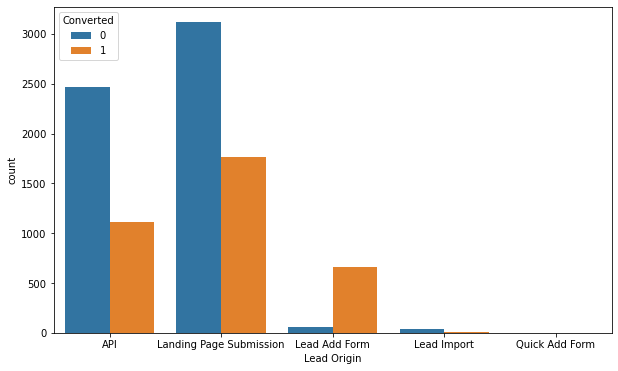

In [43]:
# Countplot based on converted values for  Column Lead Origin :

plt.figure(figsize=(10,6))
sns.countplot(leads['Lead Origin'], hue=leads.Converted)

plt.show()

### Inference 1 : Landing page submission shows highest number of leads followed by AP1.
### Inference 2 : Conversion count is also high for Landing page Submission & API, however, need to improve the conversion rate.
### Inference 3 : Lead Add Form have vary high conversion rate but its genereating less no. of leads.
### Inference 4 : Lead imports and Quick Add Form are generating negligible lead.

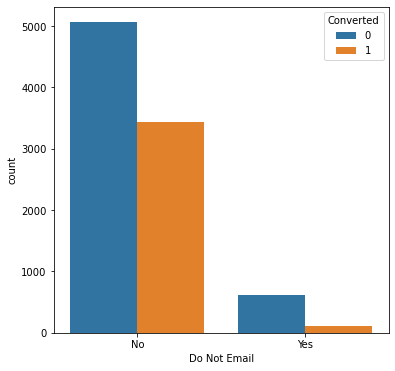

In [44]:
# Countplot based on converted values for  Column Do Not Email:

plt.figure(figsize=(6,6))
sns.countplot(leads['Do Not Email'], hue=leads.Converted)

plt.show()

In [45]:
round(100*leads['Do Not Email'].value_counts(dropna = False)/len(leads['Do Not Email']),2)

No     92.06
Yes     7.94
Name: Do Not Email, dtype: float64

### Inference : Do Not Email column show highly skewed and imbalance data towards "No" so it can be dropped.

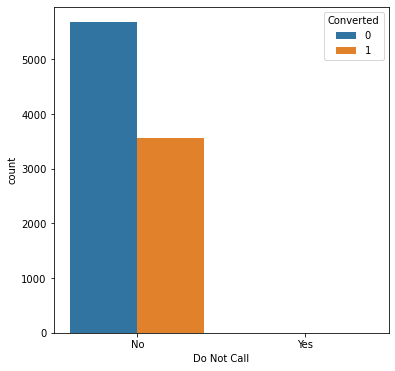

In [46]:
# Countplot based on converted values for  Column Do Not Call:

plt.figure(figsize=(6,6))
sns.countplot(leads['Do Not Call'], hue=leads.Converted)

plt.show()

In [47]:
round(100*leads['Do Not Call'].value_counts(dropna = False)/len(leads['Do Not Call']),2)

No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64

### Inference : Do Not Call column show highly skewed and imbalance data towards "No" so it can be dropped.

In [48]:
# Dropping Do Not Call & Do Not Email columns :

leads = leads.drop(["Do Not Email","Do Not Call"], axis =1 )

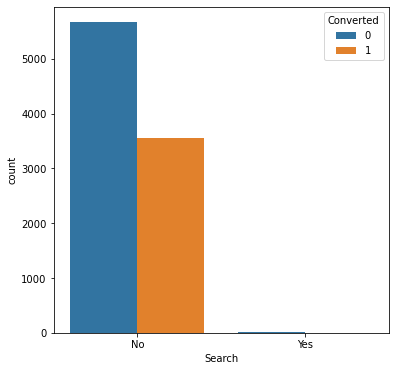

In [49]:
# Countplot based on converted values for  Column Search:

plt.figure(figsize=(6,6))
sns.countplot(leads['Search'], hue=leads.Converted)

plt.show()

In [50]:
round(100*leads['Search'].value_counts(dropna = False)/len(leads['Search']),2)

No     99.85
Yes     0.15
Name: Search, dtype: float64

### Inference : Search column show highly skewed and imbalance data towards "No" so it can be dropped.

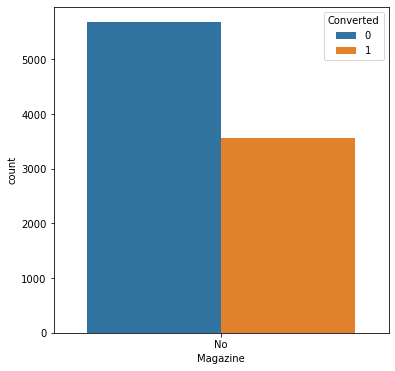

In [51]:
# Countplot based on converted values for  Column Magazine:

plt.figure(figsize=(6,6))
sns.countplot(leads['Magazine'], hue=leads.Converted)

plt.show()

In [52]:
round(100*leads['Magazine'].value_counts(dropna = False)/len(leads['Magazine']),2)

No    100.0
Name: Magazine, dtype: float64

### Inference : Magazine column show highly skewed and imbalance data towards "No" so it can be dropped.

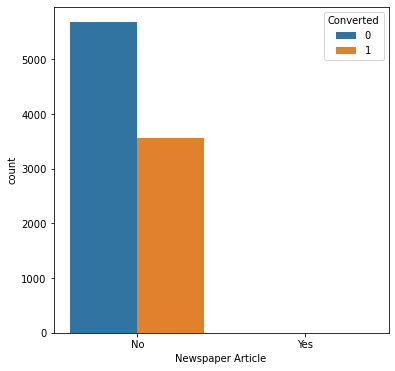

In [53]:
# Countplot based on converted values for  Column Newspaper Article:

plt.figure(figsize=(6,6))
sns.countplot(leads['Newspaper Article'], hue=leads.Converted)

plt.show()

In [54]:
round(100*leads['Newspaper Article'].value_counts(dropna = False)/len(leads['Newspaper Article']),2)

No     99.98
Yes     0.02
Name: Newspaper Article, dtype: float64

### Inference : Newspaper Article column show highly skewed and imbalance data towards "No" so it can be dropped.

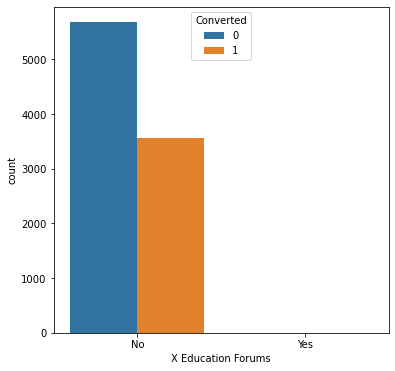

In [55]:
# Countplot based on converted values for  Column X Education Forums:

plt.figure(figsize=(6,6))
sns.countplot(leads['X Education Forums'], hue=leads.Converted)

plt.show()

In [56]:
round(100*leads['X Education Forums'].value_counts(dropna = False)/len(leads['X Education Forums']),2)

No     99.99
Yes     0.01
Name: X Education Forums, dtype: float64

### Inference : X Education Forums column show highly skewed and imbalance data towards "No" so it can be dropped.

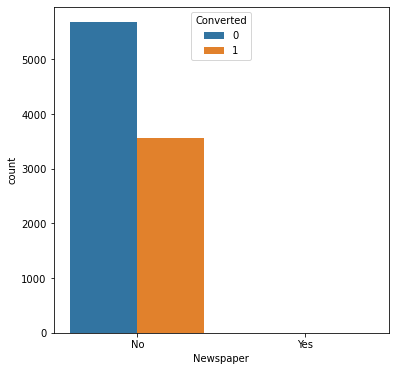

In [57]:
# Countplot based on converted values for  Newspaper:

plt.figure(figsize=(6,6))
sns.countplot(leads['Newspaper'], hue=leads.Converted)

plt.show()

In [58]:
round(100*leads['Newspaper'].value_counts(dropna = False)/len(leads['Newspaper']),2)

No     99.99
Yes     0.01
Name: Newspaper, dtype: float64

### Inference : Newspaper column show highly skewed and imbalance data towards "No" so it can be dropped.

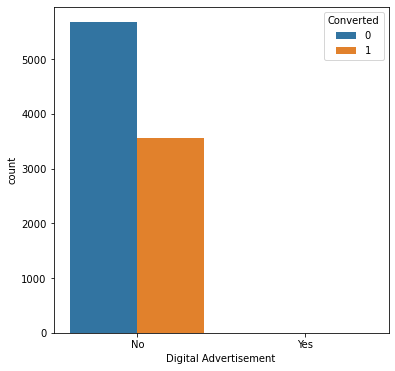

In [59]:
# Countplot based on converted values for  Digital Advertisement:

plt.figure(figsize=(6,6))
sns.countplot(leads['Digital Advertisement'], hue=leads.Converted)

plt.show()

In [60]:
round(100*leads['Digital Advertisement'].value_counts(dropna = False)/len(leads['Digital Advertisement']),2)

No     99.96
Yes     0.04
Name: Digital Advertisement, dtype: float64

### Inference : Digital Advertisement column show highly skewed and imbalance data towards "No" so it can be dropped.

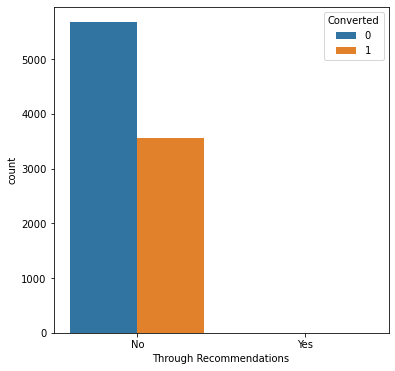

In [61]:
# Countplot based on converted values for  Through Recommendations:

plt.figure(figsize=(6,6))
sns.countplot(leads['Through Recommendations'], hue=leads.Converted)

plt.show()

In [62]:
round(100*leads['Through Recommendations'].value_counts(dropna = False)/len(leads['Through Recommendations']),2)

No     99.92
Yes     0.08
Name: Through Recommendations, dtype: float64

### Inference : Through Recommendations column show highly skewed and imbalance data towards "No" so it can be dropped.

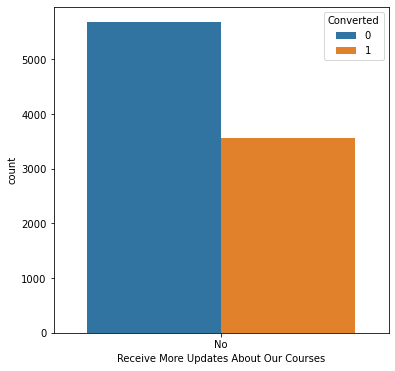

In [63]:
# Countplot based on converted values for  Receive More Updates About Our Courses :

plt.figure(figsize=(6,6))
sns.countplot(leads['Receive More Updates About Our Courses'], hue=leads.Converted)

plt.show()

In [64]:
round(100*leads['Receive More Updates About Our Courses'].value_counts(dropna = False)/len(leads['Receive More Updates About Our Courses']),2)

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

### Inference : Receive More Updates About Our Courses column show highly skewed and imbalance data towards "No" so it can be dropped.

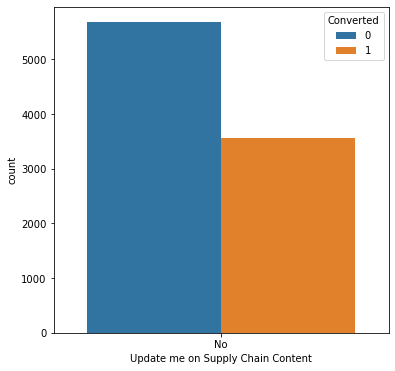

In [65]:
# Countplot based on converted values for Update me on Supply Chain Content :

plt.figure(figsize=(6,6))
sns.countplot(leads['Update me on Supply Chain Content'], hue=leads.Converted)

plt.show()

In [66]:
round(100*leads['Update me on Supply Chain Content'].value_counts(dropna = False)/len(leads['Update me on Supply Chain Content']),2)

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

### Inference : Update me on Supply Chain Content column show highly skewed and imbalance data towards "No" so it can be dropped.

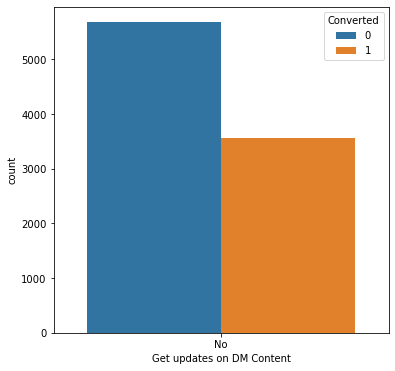

In [67]:
# Countplot based on converted values for Get updates on DM Content :

plt.figure(figsize=(6,6))
sns.countplot(leads['Get updates on DM Content'], hue=leads.Converted)

plt.show()

In [68]:
round(100*leads['Get updates on DM Content'].value_counts(dropna = False)/len(leads['Get updates on DM Content']),2)

No    100.0
Name: Get updates on DM Content, dtype: float64

### Inference : Get updates on DM Content column show highly skewed and imbalance data towards "No" so it can be dropped.

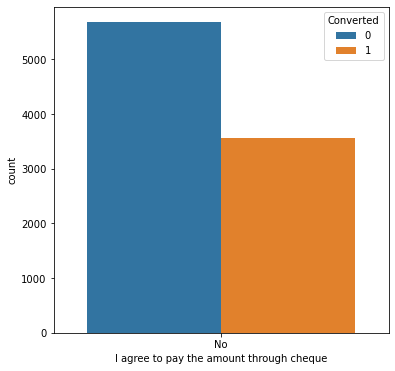

In [69]:
# Countplot based on converted values for I agree to pay the amount through cheque :

plt.figure(figsize=(6,6))
sns.countplot(leads['I agree to pay the amount through cheque'], hue=leads.Converted)

plt.show()

In [70]:
round(100*leads['I agree to pay the amount through cheque'].value_counts(dropna = False)/len(leads['Get updates on DM Content']),2)

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

### Inference : I agree to pay the amount through cheque column show highly skewed and imbalance data towards "No" so it can be dropped.

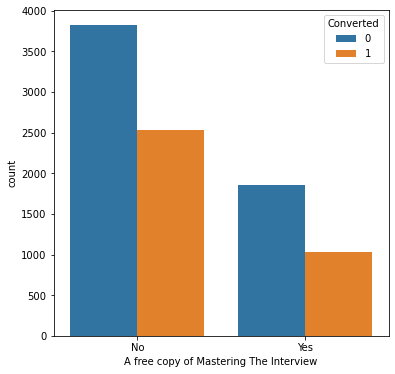

In [71]:
# Countplot based on converted values for A free copy of Mastering The Interview :

plt.figure(figsize=(6,6))
sns.countplot(leads['A free copy of Mastering The Interview'], hue=leads.Converted)

plt.show()

In [72]:
round(100*leads['A free copy of Mastering The Interview'].value_counts(dropna = False)/len(leads['A free copy of Mastering The Interview']),2)

No     68.74
Yes    31.26
Name: A free copy of Mastering The Interview, dtype: float64

### Inference : A free copy of Mastering The Interview column show highly skewed and imbalance data towards "No" so it can be dropped.

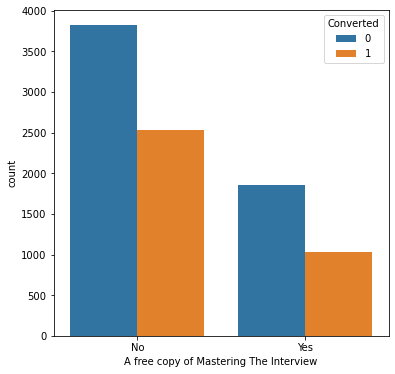

In [73]:
# Countplot based on converted values for A free copy of Mastering The Interview :

plt.figure(figsize=(6,6))
sns.countplot(leads['A free copy of Mastering The Interview'], hue=leads.Converted)

plt.show()

In [74]:
round(100*leads['A free copy of Mastering The Interview'].value_counts(dropna = False)/len(leads['A free copy of Mastering The Interview']),2)

No     68.74
Yes    31.26
Name: A free copy of Mastering The Interview, dtype: float64

### Inference : A free copy of Mastering The Interview column show highly skewed and imbalance data towards "No" so it can be dropped.

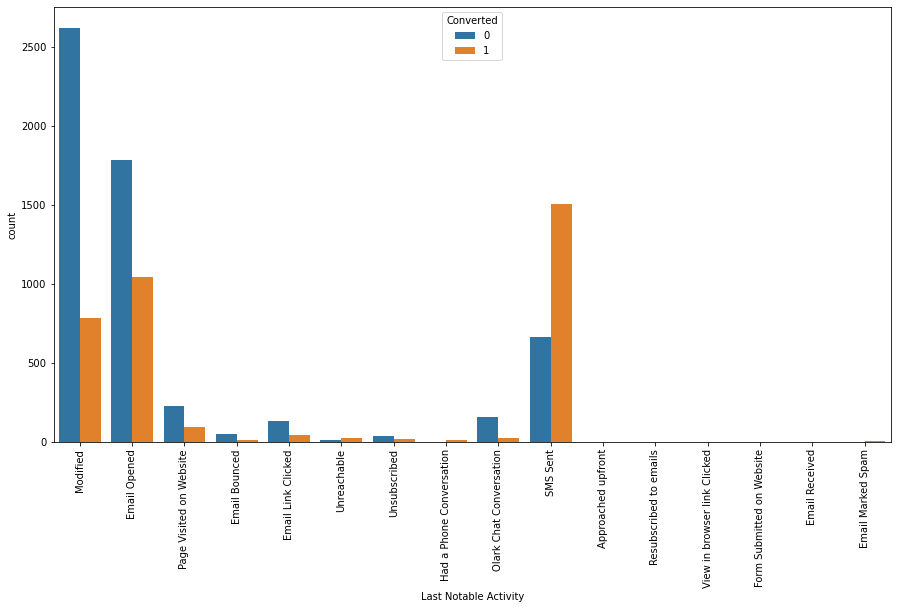

In [75]:
# Countplot based on converted values for Last Notable Activity :

plt.figure(figsize=(15,8))
sns.countplot(leads['Last Notable Activity'], hue=leads.Converted)
plt.xticks(rotation = 90)
plt.show()

In [76]:
round(100*leads['Last Notable Activity'].value_counts(dropna = False)/len(leads['Last Notable Activity']),2)

Modified                        36.87
Email Opened                    30.60
SMS Sent                        23.51
Page Visited on Website          3.44
Olark Chat Conversation          1.98
Email Link Clicked               1.87
Email Bounced                    0.65
Unsubscribed                     0.51
Unreachable                      0.35
Had a Phone Conversation         0.15
Email Marked Spam                0.02
Form Submitted on Website        0.01
Resubscribed to emails           0.01
Approached upfront               0.01
View in browser link Clicked     0.01
Email Received                   0.01
Name: Last Notable Activity, dtype: float64

In [77]:
# Combining lower frequency catergories to "Other"

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')
round(100*leads['Last Notable Activity'].value_counts(dropna = False)/len(leads['Last Notable Activity']),2)


Modified                   36.87
Email Opened               30.60
SMS Sent                   23.51
Page Visited on Website     3.44
Olark Chat Conversation     1.98
Email Link Clicked          1.87
Others                      1.73
Name: Last Notable Activity, dtype: float64

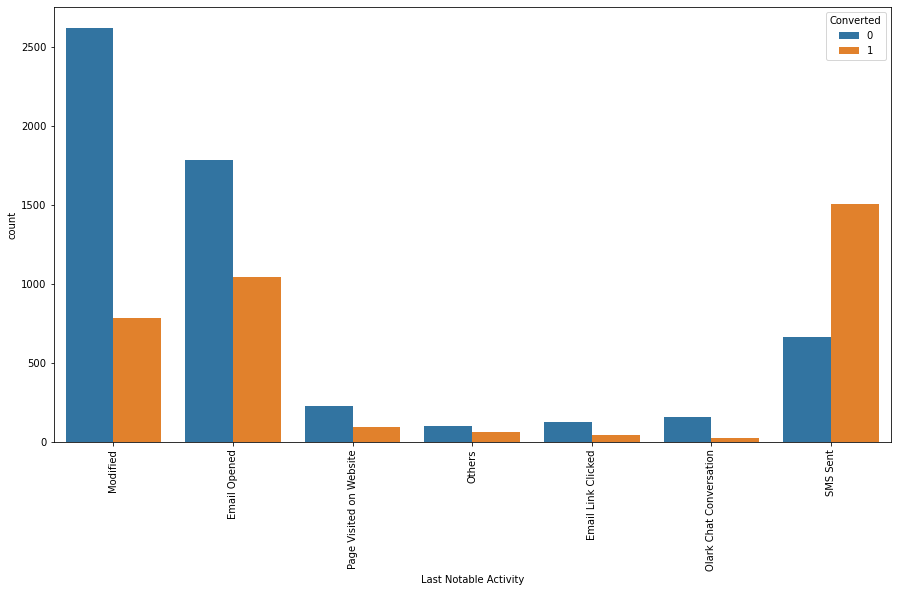

In [78]:
# Countplot after cleaning :

plt.figure(figsize=(15,8))
sns.countplot(leads['Last Notable Activity'], hue=leads.Converted)
plt.xticks(rotation = 90)
plt.show()

In [79]:
# Dropping above imbalaced columns :

leads = leads.drop(["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
                    "Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content",
                    "Get updates on DM Content","I agree to pay the amount through cheque"], axis = 1)

In [80]:
leads.shape

(9240, 13)

### Checking Correlation between Numeraical Variables

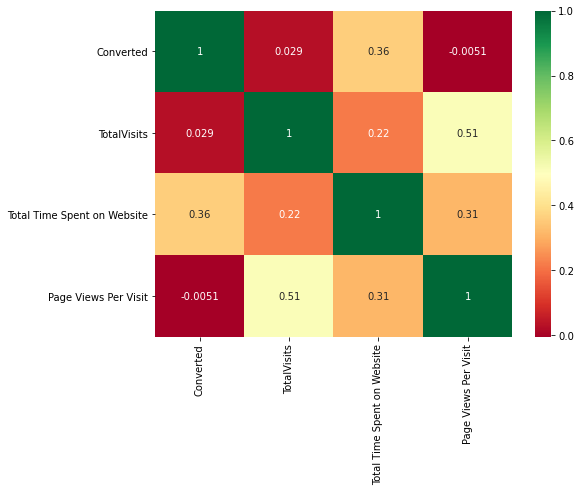

In [81]:
# Heatmap

plt.figure(figsize =[8,6])
sns.heatmap(leads.corr(), cmap="RdYlGn", annot=True)
plt.show()

### Inference : There is negative correlation between Converted & Page Views per Visit

### Outlier Analysis and Treatment on Numeraical Variables

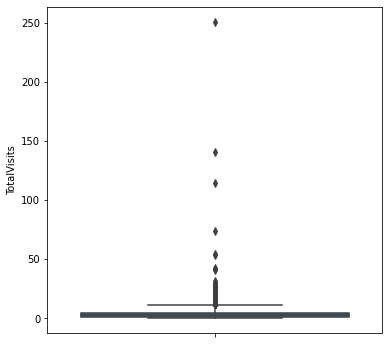

In [82]:
# Checking outliers for Total Visit:

plt.figure(figsize=(6,6))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

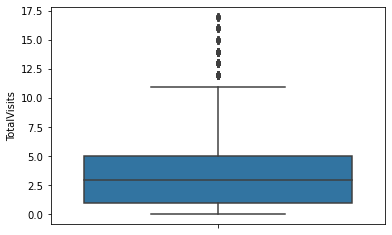

In [83]:
# Removing 1% from top & bottom from the percentile range:

q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= q3)]
q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

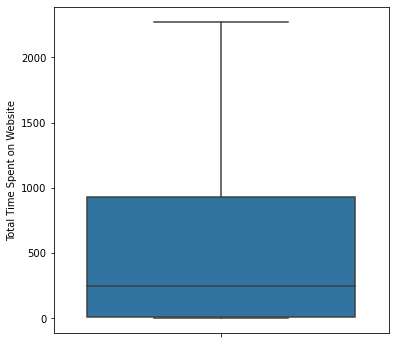

In [84]:
# Checking outliers for Total Time Spent on Website:

plt.figure(figsize=(6,6))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

No outliers present here

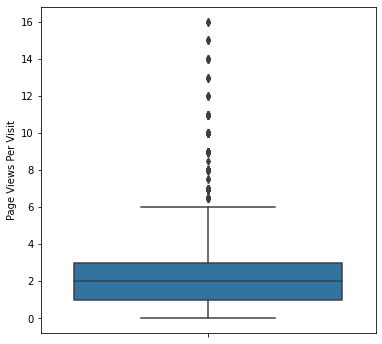

In [85]:
# Checking outliers for Page Views Per Visit:

plt.figure(figsize=(6,6))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

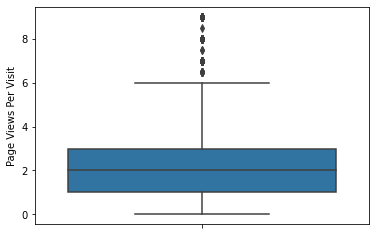

In [86]:
# Removing 1% from top & bottom from the percentile range:

q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[(leads['Page Views Per Visit'] <= q3)]
q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[(leads['Page Views Per Visit'] >= q1)]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [87]:
# Checking for dataframe shape
leads.shape

(9090, 13)

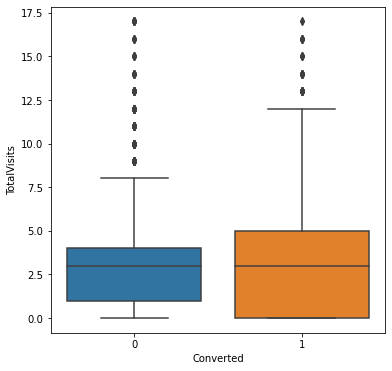

In [88]:
# Checking Converted vs TotalVisits :

plt.figure(figsize=(6,6))
sns.boxplot( data = leads, x = 'Converted', y = 'TotalVisits')
plt.show()

### Inference : The median of TotalVisits and Converted is similar

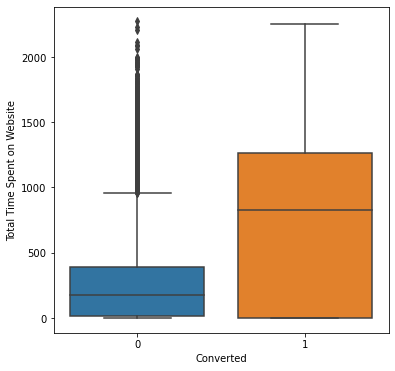

In [89]:
# Checking Converted vs Total Time Spent on Website :

plt.figure(figsize=(6,6))
sns.boxplot( data = leads, x = 'Converted', y = 'Total Time Spent on Website')
plt.show()

### Inference : This shows that the higher the Total Time Spent on Website, the higher the Conversion.

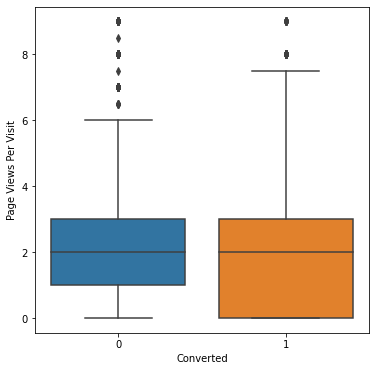

In [90]:
# Checking Converted vs Total Page Views Per Visit :

plt.figure(figsize=(6,6))
sns.boxplot( data = leads, x = 'Converted', y = 'Page Views Per Visit')
plt.show()

### Inference : The median for  Page Views Per Visit & Converted leads is similar.

In [91]:
# Checking the shape of dataframe now :

leads.shape

(9090, 13)

In [92]:
# Checking if any missing values are still remaining :

leads.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Tags                                             0
A free copy of Mastering The Interview           0
Last Notable Activity                            0
dtype: int64

In [93]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9090 non-null   object 
 1   Lead Source                                    9090 non-null   object 
 2   Converted                                      9090 non-null   int64  
 3   TotalVisits                                    9090 non-null   float64
 4   Total Time Spent on Website                    9090 non-null   int64  
 5   Page Views Per Visit                           9090 non-null   float64
 6   Last Activity                                  9090 non-null   object 
 7   Specialization                                 9090 non-null   object 
 8   What is your current occupation                9090 non-null   object 
 9   What matters most to you in choosing a course  9090 

In [94]:
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Better Career Prospects,Interested in other courses,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,Better Career Prospects,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Better Career Prospects,Ringing,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Better Career Prospects,Will revert after reading the email,No,Modified


# Data Preparation

## Creating Dummy values for categorical variables

In [95]:
# Subsetting all categorical vaiables :

leads_categorical = leads.select_dtypes(include=['object'])
leads_categorical.head()

,Lead Origin,Lead Source,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,Others,Unemployed,Better Career Prospects,Interested in other courses,No,Modified
1,API,Organic Search,Email Opened,Others,Unemployed,Better Career Prospects,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,Others,Media and Advertising,Unemployed,Better Career Prospects,Ringing,No,Modified
4,Landing Page Submission,Google,Converted to Lead,Others,Unemployed,Better Career Prospects,Will revert after reading the email,No,Modified


In [96]:
# Converting categorical variables to dummy variables:

leads_dummies = pd.get_dummies(leads_categorical,drop_first=True)
leads_dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [97]:
leads_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 79 columns):
 #   Column                                                                   Non-Null Count  Dtype
---  ------                                                                   --------------  -----
 0   Lead Origin_Landing Page Submission                                      9090 non-null   uint8
 1   Lead Origin_Lead Add Form                                                9090 non-null   uint8
 2   Lead Origin_Lead Import                                                  9090 non-null   uint8
 3   Lead Origin_Quick Add Form                                               9090 non-null   uint8
 4   Lead Source_Google                                                       9090 non-null   uint8
 5   Lead Source_Live Chat                                                    9090 non-null   uint8
 6   Lead Source_Olark Chat                                                   9090 non-null  

In [98]:
list(leads_categorical.columns)

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [99]:
# Since we have converted the categorical varaible into dummies we can drop them and 
# combine the leads dataframe with leads_dummies dataframe

leads =leads.drop(list(leads_categorical.columns), axis=1)

leads = pd.concat([leads, leads_dummies],axis=1)
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [100]:
leads.shape

(9090, 83)

In [101]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 83 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Converted                                                                9090 non-null   int64  
 1   TotalVisits                                                              9090 non-null   float64
 2   Total Time Spent on Website                                              9090 non-null   int64  
 3   Page Views Per Visit                                                     9090 non-null   float64
 4   Lead Origin_Landing Page Submission                                      9090 non-null   uint8  
 5   Lead Origin_Lead Add Form                                                9090 non-null   uint8  
 6   Lead Origin_Lead Import                                                 

## Splitting the dataframe into Train & Test sets

In [102]:
y = leads['Converted']

X = leads.drop(['Converted'], axis =1)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size = 0.7, random_state = 100)
print(X_train.shape)
print(X_test.shape)

(6363, 82)
(2727, 82)


### Scaling Train set using Standard Scalar 

In [104]:
ss = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = ss.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
302,1.336782,-0.428736,0.044021,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6087,-1.094877,-0.887355,-1.206716,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1033,0.642022,-0.025151,1.477269,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7656,0.989402,-0.241619,2.014065,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3241,0.294642,0.897591,-0.492776,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


# Model building using RFE


# <font color = green >Training the model - Model Building on Train Set</font>

In [105]:
# Running RFE with 15 variable as output

logreg = LogisticRegression()

rfe = RFE(logreg, 15)  
rfe = rfe.fit(X_train, y_train)


In [106]:
rfe.support_

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
        True, False, False, False, False,  True,  True,  True, False,
       False,  True,  True, False, False,  True,  True, False, False,
       False])

In [107]:
# List of Columns with RFE ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 38),
 ('Total Time Spent on Website', False, 7),
 ('Page Views Per Visit', False, 39),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 41),
 ('Lead Origin_Quick Add Form', False, 27),
 ('Lead Source_Google', False, 55),
 ('Lead Source_Live Chat', False, 64),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', False, 36),
 ('Lead Source_Others', False, 21),
 ('Lead Source_Reference', False, 9),
 ('Lead Source_Referral Sites', False, 56),
 ('Lead Source_Social Media', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 5),
 ('Last Activity_Email Link Clicked', False, 51),
 ('Last Activity_Email Opened', False, 19),
 ('Last Activity_Form Submitted on Website', False, 22),
 ('Last Activity_Olark Chat Conversation', False, 29),
 ('Last Activity_Others', False, 48),
 ('Last Activity_Page Visited on Website', False, 57),
 ('La

In [108]:
# List of Colums with no.1 ranking by RFE and which are supported by RFE

#list of RFE supported columns

col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

### Using statsmodel while building models for statistical summary

In [109]:
 #  Creating Model1 :
     
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1407.2
Date:                Sun, 07 Feb 2021   Deviance:                       2814.5
Time:                        17:18:51   Pearson chi2:                 9.74e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.1651      0.203    -15.600      0.000      -3.563      -2.767
Lead Origin_Lead Add Form                         0.6983      0.348      2.007      0.045       0.016       1.380
Lead Source_Welingak Website                      4.8858      1.086      4.500      0.000       2.758       7.014
Last Activity_SMS Sent                            2.0678      0.109     18.950      0.000       1.854       2.282
Tags_Busy                                         2.4528      0.291      8.440      0.000       1.883       3.022
Tags_Closed by Horizzon                           8.9042      0.754     11.809      0.000       7.426      10.382
Tags_Lost to EINS                                 8.5312      0.748     11.412      0.000       7.066       9.996
Tags_Others                                       1.8308      0.207      8.836      0.000       1.425       2.237
Tags_Ringing                                     -1.3540      0.292     -4.640      0.000      -1.926      -0.782
Tags_Will revert after reading the email          6.4289      0.252     25.491      0.000       5.935       6.923
Tags_in touch with EINS                           2.6489      0.883      3.000      0.003       0.918       4.380
Tags_invalid number                              -2.0005      1.041     -1.922      0.055      -4.041       0.040
Tags_switched off                                -2.5488      0.746     -3.418      0.001      -4.011      -1.087
Tags_wrong number given                         -21.3191   1.46e+04     -0.001      0.999   -2.86e+04    2.85e+04
Last Notable Activity_Modified                   -1.8128      0.119    -15.173      0.000      -2.047      -1.579
Last Notable Activity_Olark Chat Conversation    -1.5382      0.419     -3.673      0.000      -2.359      -0.717
=================================================================================================================
"""

### Checking VIF

In [110]:
# Checking VIF1

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Source_Welingak Website,1.32
4,Tags_Closed by Horizzon,1.25
3,Tags_Busy,1.05
5,Tags_Lost to EINS,1.05
14,Last Notable Activity_Olark Chat Conversation,1.05
11,Tags_switched off,1.04
10,Tags_invalid number,1.01
9,Tags_in touch with EINS,1.00
12,Tags_wrong number given,1.00
0,Lead Origin_Lead Add Form,0.81


In [111]:
# Removing "Tags_wrong number given" as it has a very high P-value

col =col.drop('Tags_wrong number given',1)

In [112]:
# Creating Model2

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1409.9
Date:                Sun, 07 Feb 2021   Deviance:                       2819.8
Time:                        17:18:51   Pearson chi2:                 9.69e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.2555      0.204    -15.995      0.000      -3.654      -2.857
Lead Origin_Lead Add Form                         0.7045      0.349      2.021      0.043       0.021       1.388
Lead Source_Welingak Website                      4.8727      1.086      4.489      0.000       2.745       7.000
Last Activity_SMS Sent                            2.0528      0.109     18.897      0.000       1.840       2.266
Tags_Busy                                         2.5508      0.290      8.799      0.000       1.983       3.119
Tags_Closed by Horizzon                           8.9846      0.754     11.909      0.000       7.506      10.463
Tags_Lost to EINS                                 8.6140      0.748     11.516      0.000       7.148      10.080
Tags_Others                                       1.9248      0.207      9.288      0.000       1.519       2.331
Tags_Ringing                                     -1.2520      0.291     -4.305      0.000      -1.822      -0.682
Tags_Will revert after reading the email          6.5153      0.253     25.745      0.000       6.019       7.011
Tags_in touch with EINS                           2.7377      0.883      3.102      0.002       1.008       4.468
Tags_invalid number                              -1.8973      1.041     -1.823      0.068      -3.937       0.142
Tags_switched off                                -2.4453      0.745     -3.281      0.001      -3.906      -0.984
Last Notable Activity_Modified                   -1.8039      0.119    -15.113      0.000      -2.038      -1.570
Last Notable Activity_Olark Chat Conversation    -1.5372      0.419     -3.672      0.000      -2.358      -0.717
=================================================================================================================
"""

In [113]:
# Checking VIF2

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Source_Welingak Website,1.32
4,Tags_Closed by Horizzon,1.25
3,Tags_Busy,1.05
5,Tags_Lost to EINS,1.05
13,Last Notable Activity_Olark Chat Conversation,1.05
11,Tags_switched off,1.04
10,Tags_invalid number,1.01
9,Tags_in touch with EINS,1.00
0,Lead Origin_Lead Add Form,0.81
8,Tags_Will revert after reading the email,0.15


In [114]:
# Removing "Tags_invalid number" as it has a  high P-value

col =col.drop('Tags_invalid number',1)

In [115]:
# Creating Model3

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1412.7
Date:                Sun, 07 Feb 2021   Deviance:                       2825.5
Time:                        17:18:52   Pearson chi2:                 9.63e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.4102      0.202    -16.910      0.000      -3.805      -3.015
Lead Origin_Lead Add Form                         0.7143      0.350      2.043      0.041       0.029       1.399
Lead Source_Welingak Website                      4.8522      1.085      4.470      0.000       2.725       6.980
Last Activity_SMS Sent                            2.0295      0.108     18.814      0.000       1.818       2.241
Tags_Busy                                         2.7171      0.286      9.485      0.000       2.156       3.279
Tags_Closed by Horizzon                           9.1236      0.755     12.091      0.000       7.645      10.603
Tags_Lost to EINS                                 8.7568      0.748     11.706      0.000       7.291      10.223
Tags_Others                                       2.0849      0.204     10.207      0.000       1.685       2.485
Tags_Ringing                                     -1.0793      0.287     -3.764      0.000      -1.641      -0.517
Tags_Will revert after reading the email          6.6638      0.252     26.412      0.000       6.169       7.158
Tags_in touch with EINS                           2.8898      0.881      3.279      0.001       1.162       4.617
Tags_switched off                                -2.2703      0.744     -3.053      0.002      -3.728      -0.813
Last Notable Activity_Modified                   -1.7899      0.119    -15.017      0.000      -2.023      -1.556
Last Notable Activity_Olark Chat Conversation    -1.5367      0.418     -3.673      0.000      -2.357      -0.717
=================================================================================================================
"""

In [116]:
# Checking VIF3

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
1,Lead Source_Welingak Website,1.32
4,Tags_Closed by Horizzon,1.25
3,Tags_Busy,1.05
5,Tags_Lost to EINS,1.05
12,Last Notable Activity_Olark Chat Conversation,1.05
10,Tags_switched off,1.04
9,Tags_in touch with EINS,1.00
0,Lead Origin_Lead Add Form,0.81
8,Tags_Will revert after reading the email,0.15
2,Last Activity_SMS Sent,0.08


## All values in Model 3 are now in seems to be in order and significant so moving on to next step of predictions

In [117]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

302     0.209943
6087    0.042486
1033    0.209943
7656    0.078709
3241    0.994949
5738    0.209943
7366    0.005486
3680    0.042486
4170    0.994949
43      0.209943
dtype: float64

In [118]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20994261, 0.04248648, 0.20994261, 0.07870878, 0.99494875,
       0.20994261, 0.00548596, 0.04248648, 0.99494875, 0.20994261])

In [119]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.209943,302
1,0,0.042486,6087
2,0,0.209943,1033
3,0,0.078709,7656
4,1,0.994949,3241


###  Taking a threshold value of 50%, Creating column "Predicted" with value 1 if Coverted_prob is > 0.5 else it will have values as 0

In [120]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.209943,302,0
1,0,0.042486,6087,0
2,0,0.209943,1033,0
3,0,0.078709,7656,0
4,1,0.994949,3241,1


In [121]:
# Creating Confusion Matrix to check for Metrics like -
# Accuracy, Sensitivity, Specificity, False Positive Rate, Postive Predictive Value and Negative Predictive Value

# Confusion matrix :
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3774  161]
 [ 320 2108]]


In [122]:
# Checking Accuracy :

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9244067263869244


In [123]:
# True positive
TP = confusion[1,1] 

# True negative 
TN = confusion[0,0] 

# False positives
FP = confusion[0,1]

# False negatives
FN = confusion[1,0] 

In [124]:
# Calculating Sensitivity for our logistic regression model :

TP / float(TP+FN)

0.8682042833607908

In [125]:
# Calculating Specificity for our logistic regression model :
TN / float(TN+FP)

0.9590851334180432

In [126]:
# Calculating False positive rate for our logistic regression model :

FP/ float(TN+FP)

0.040914866581956796

In [127]:
# Calculating False negative rate for our logistic regression model :

FN/ float(FN+TP)

0.13179571663920922

## ROC Curve

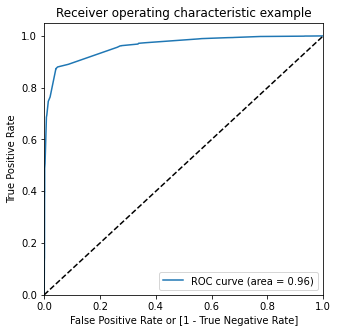

In [128]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.show()

### Observation 1 : Model 3 Shows High accuracy value 0.92, High Sensitivity value 0.86, High Specificity value 0.95
### Observation 2 : Model 3 show value of area under ROC curve "0.96"
### Inference : Above observations shows that Model 3 is a good predictive model

# Finding out actual Optimal Threshold value, as we have chosen an arbitrary value of 0.5

In [129]:
### Creating columns with different probabilty cutoffs :

num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.209943,302,0,1,1,1,0,0,0,0,0,0,0
1,0,0.042486,6087,0,1,0,0,0,0,0,0,0,0,0
2,0,0.209943,1033,0,1,1,1,0,0,0,0,0,0,0
3,0,0.078709,7656,0,1,0,0,0,0,0,0,0,0,0
4,1,0.994949,3241,1,1,1,1,1,1,1,1,1,1,1


In [130]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs :

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.815024  0.961697  0.724524
0.2   0.2  0.816910  0.961697  0.727573
0.3   0.3  0.924564  0.880148  0.951970
0.4   0.4  0.924721  0.869028  0.959085
0.5   0.5  0.924407  0.868204  0.959085
0.6   0.6  0.924407  0.868204  0.959085
0.7   0.7  0.896904  0.764003  0.978907
0.8   0.8  0.894547  0.747117  0.985515
0.9   0.9  0.875216  0.685750  0.992122


<Figure size 720x432 with 0 Axes>

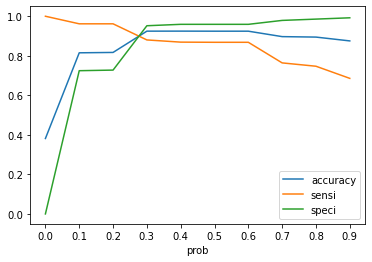

In [131]:
# Plotting Accuracy , Sensitivity & Specificity with all above probabilities:

plt.figure(figsize=(10,6))

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

plt.xticks(np.arange(0, 1, step=0.1), size = 10)

plt.show()



### This shows optimal Threshold at around 0.3

## So taking threshold at 0.3, Creating column "Predicted" with value 1 if Coverted_prob is > 0.3 else it will have values as 0

In [132]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.209943,302,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.042486,6087,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.209943,1033,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.078709,7656,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.994949,3241,1,1,1,1,1,1,1,1,1,1,1,1


## Calucating and assigning Lead Score

In [133]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.209943,302,0,21
1,0,0.042486,6087,0,4
2,0,0.209943,1033,0,21
3,0,0.078709,7656,0,8
4,1,0.994949,3241,1,99


### Model Evaluation

In [134]:
# Checking again for Accuracy :

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9245638849599246

In [135]:
# Creating Second Confusion Matrix to check for Sensitivity & Specificity

# Confusion matrix :
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3746,  189],
       [ 291, 2137]], dtype=int64)

In [136]:
# True positive
TP = confusion2[1,1] 

# True negative 
TN = confusion2[0,0] 

# False positives
FP = confusion2[0,1]

# False negatives
FN = confusion2[1,0] 

In [137]:
# Calculating Sensitivity for our logistic regression model :

TP / float(TP+FN)

0.8801482701812191

In [138]:
# Calculating Specificity for our logistic regression model :
TN / float(TN+FP)

0.9519695044472681

In [139]:
# Calculating False positive rate for our logistic regression model :

FP/ float(TN+FP)

0.048030495552731894

In [140]:
# Calculating False negative rate for our logistic regression model :

FN/ float(FN+TP)

0.1198517298187809

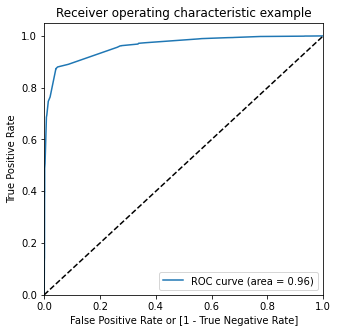

In [141]:
# ROC Curve :

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

plt.show()


### Results after taking Optimal Threshold Value of 0.3

### High accuracy value of 92.45%
### High Sensitivity value 88.01% 
### High Specificity value 95.19%
### Area under ROC curve 96%
### Inference : Above observations shows that Model 3 is a better predictive model at threshold of 0.3

In [142]:
# Checking Precision :
TP / TP + FP

confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.9187446259673259

In [143]:
# Checking Recall :
TP / TP + FN

confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])


0.8801482701812191

In [144]:
# Checking Precision score from SKLearn:

precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.9187446259673259

In [145]:
# Checking Recall  score from SKLearn:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)


0.8801482701812191

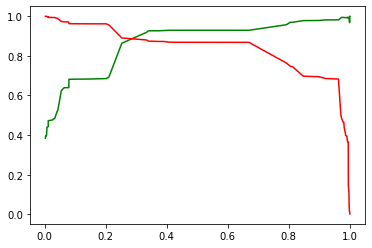

In [146]:

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# <font color = Blue > Model Application and Prediction on Test Set</font>

### Scaling Test Set

In [147]:

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = ss.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
6906,0.306196,1.891958,-0.154745,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1873,-0.386173,-0.542475,-0.154745,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
771,1.344750,-0.790628,2.446282,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4495,0.306196,-0.618551,0.885666,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
9061,-0.386173,2.359282,-0.154745,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [148]:
X_test = X_test[col]
X_test.head()


,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
6906,0,0,1,0,0,0,0,0,1,0,0,0,0
1873,0,0,1,0,0,0,0,0,0,0,0,1,0
771,0,0,0,0,0,0,0,1,0,0,0,0,0
4495,0,0,0,0,0,0,0,1,0,0,0,0,0
9061,0,0,0,0,0,1,0,0,0,0,0,1,0


In [149]:
# Adding constant :

X_test_sm = sm.add_constant(X_test)

In [150]:
# Predictions on Test Set :

y_test_pred = res.predict(X_test_sm)

y_test_pred[:10]

6906    0.994949
1873    0.040288
771     0.011102
4495    0.011102
9061    0.972260
4929    0.077062
2308    0.042486
1034    0.077062
9033    0.011102
7008    0.669119
dtype: float64

In [151]:
# Creating y_pred dataframe :

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
6906,0.994949
1873,0.040288
771,0.011102
4495,0.011102
9061,0.972260


In [152]:
# Creating y_test dataframe :

y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
6906,1
1873,0
771,0
4495,0
9061,1


In [153]:
# Adding Customer id to index:

y_test_df['Prospect ID'] = y_test_df.index

In [154]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [155]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,Prospect ID,0
0,1,6906,0.994949
1,0,1873,0.040288
2,0,771,0.011102
3,0,4495,0.011102
4,1,9061,0.972260


In [156]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,6906,0.994949
1,0,1873,0.040288
2,0,771,0.011102
3,0,4495,0.011102
4,1,9061,0.972260


### Calculating Lead Score

In [157]:

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,6906,1,0.994949,99
1,1873,0,0.040288,4
2,771,0,0.011102,1
3,4495,0,0.011102,1
4,9061,1,0.972260,97


In [158]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,6906,1,0.994949,99,1
1,1873,0,0.040288,4,0
2,771,0,0.011102,1,0
3,4495,0,0.011102,1,0
4,9061,1,0.972260,97,1


In [159]:
# Checking Overall  Accuracy :

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9248258159149249

In [160]:
# Confusion matrix :
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion3


array([[1587,   73],
       [ 132,  935]], dtype=int64)

In [161]:
# True positive
TP = confusion3[1,1] 

# True negative 
TN = confusion3[0,0] 

# False positives
FP = confusion3[0,1]

# False negatives
FN = confusion3[1,0] 

In [162]:
# Calculating Sensitivity for our logistic regression model :

TP / float(TP+FN)

0.8762886597938144

In [163]:
# Calculating Specificity for our logistic regression model :
TN / float(TN+FP)

0.9560240963855422

In [164]:
# Checking Precision score :

precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.9275793650793651

In [165]:
# Checking Recall  score :

recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8762886597938144

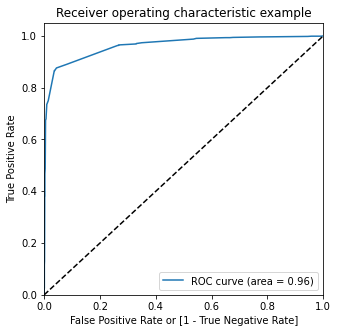

In [166]:
# ROC Curve :

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function

draw_roc(y_pred_final.Converted , y_pred_final.Converted_prob)

plt.show()

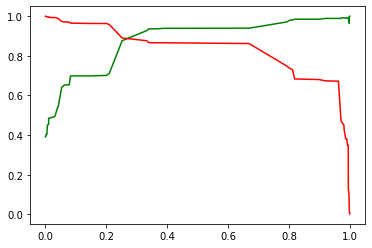

In [167]:

p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Inference for Test Set : High Accuracy 0.92, High Sensitivity 0.87, High Specificity 0.95, High Precision 0.92 and High Recall 0.87

# <font color = blue >  FINAL CONCLUSION : </font>


## Train Set  Results : 
### High Accuracy value of 92.45%
### High Sensitivity value 88.01%
### High Specificity value 95.19%

## Test Set  Results : 
### High Accuracy value of 92.48%
### High Sensitivity value 87.62%
### High Specificity value 95.60%

## We have developed a good model which is giving similar result on Test Data set also.

## Top 3 variable to focus which will contribute most towards the probability of a lead getting converted are :
###  a)	Tags_Closed by Horizzon (Coef value: 9.1236)
###  b)	Tags_Lost to EINS (Coef value: 8.7568)
###  c)	Tags_Will revert after reading the email (Coef value: 6.6638)
